In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [4]:
data  = perch_length.reshape(-1, 1)  

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, perch_weight, test_size=0.2, random_state=42
)

In [9]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(44, 1)
(12, 1)
(44,)
(12,)


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target) # 학습

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
lr.predict([[50]])

array([1238.3175398])

In [ ]:
## 선형 회기 모델이 학습한 가충치 (기울기)와 절편 ( 보정 갯수)
## 알고 리즘이 학습을 통해서 결정한 파라미터 , 모델 파라미터 , 모델 기반의 학습)
## 참고) KNN  사례 기반 학습 

print(lr.coef_, lr.intercept_)

[39.05365447] -714.3651839448922


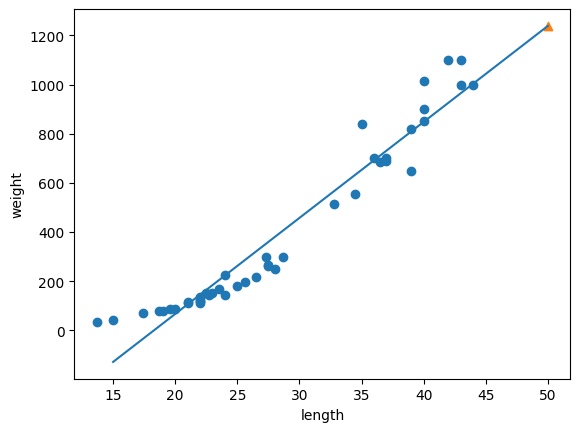

In [18]:

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(50, 1238, marker='^')
plt.plot([15,50], [lr.coef_[0] * 15 + lr.intercept_, lr.coef_[0] * 50 + lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 다향 회기 
train_poly = np.column_stack((train_input ** 2, train_input))
train_poly[:10]
test_poly = np.column_stack((test_input **2, test_input))

In [22]:
print(train_poly.shape)
print(test_poly.shape)

(44, 2)
(12, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:

lr.predict([[50 ** 2, 50]])

array([1579.0440311])

In [29]:
# 모델 파라미터 - 개수 (cofficient) / 기울기 , 절편 (intercept)/ 보정 개수(bias)
print(lr.coef_, lr.intercept_)

[  1.03238928 -22.63525541] 129.83360652841566
